## 6.5: **Unsupervised Machine Learning: Clustering**

### **This script contains the following**:¶
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path
path = r'C:\Users\karya\Sourcing Open Data'

In [4]:
path

'C:\\Users\\karya\\Sourcing Open Data'

In [5]:
# Importing boat_data

df= pd.read_csv(os.path.join(path, '02. Data','Prepared Data', 'Boat_Sales_clean_Data_Task2.csv'))

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Price category,View Performance
0,0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht,Middle price( 94800 -108000),Good (More than 170)
1,1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat,Middle price( 94800 -108000),Average (70-170)
2,2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat,Middle price( 94800 -108000),Low (less than 70)
3,3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat,Middle price( 94800 -108000),Low (less than 70)
4,4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran,Middle price( 94800 -108000),Good (More than 170)


### Create a subset of the datafram which include only quantitative variables

In [7]:
subset_df = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'price_in_Euro']]

In [8]:
df = subset_df

In [9]:
df.head()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
0,2017,4.00,1.90,226,94800.0
1,2020,4.00,1.50,75,94800.0
2,2020,3.00,1.00,64,94800.0
3,2019,3.55,1.46,58,94800.0
4,1999,6.20,2.38,474,94800.0


In [10]:
df2 =df.copy()

In [11]:
df2.head()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
0,2017,4.00,1.90,226,94800.0
1,2020,4.00,1.50,75,94800.0
2,2020,3.00,1.00,64,94800.0
3,2019,3.55,1.46,58,94800.0
4,1999,6.20,2.38,474,94800.0


## **Preprocessing** 

### Conducting Standardization using Panda (Z-Score)

#### The syntax
df[‘column’] =( df[‘column’] – df[‘column’].mean() ) / df[‘column’].std()

In [12]:
# Z-Score using pandas 
df2['Year Built'] = (df2['Year Built'] - df2['Year Built'].mean()) / df2['Year Built'].std() 

In [13]:
# Z-Score using pandas 
df2['Length'] = (df2['Length'] - df2['Length'].mean()) / df2['Length'].std() 

In [14]:
# Z-Score using pandas 
df2['Width'] = (df2['Width'] - df2['Width'].mean()) / df2['Width'].std() 

In [15]:
# Z-Score using pandas 
df2['Number of views last 7 days'] = (df2['Number of views last 7 days'] - df2['Number of views last 7 days'].mean()) / df2['Number of views last 7 days'].std() 

In [16]:
# Z-Score using pandas 
df2['price_in_Euro'] = (df2['price_in_Euro'] - df2['price_in_Euro'].mean()) / df2['price_in_Euro'].std() 

In [17]:
df2.head()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
0,0.730846,-1.287630,-1.364230,0.486042,-0.16761
1,0.914096,-1.287630,-1.694696,-0.484877,-0.16761
2,0.914096,-1.454715,-2.107779,-0.555606,-0.16761
3,0.853013,-1.362818,-1.727742,-0.594185,-0.16761
4,-0.368655,-0.920042,-0.967670,2.080663,-0.16761


### Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [18]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

[-45784.99999999928,
 -34533.341943634594,
 -29103.030002721414,
 -24177.62375636065,
 -20539.40187198408,
 -17415.22780343796,
 -15264.633600971722,
 -13962.289985252402,
 -12697.490416412102,
 -11658.611951930041,
 -10989.589540626865,
 -10132.841216841938,
 -9495.71983616622,
 -8973.361993650826]

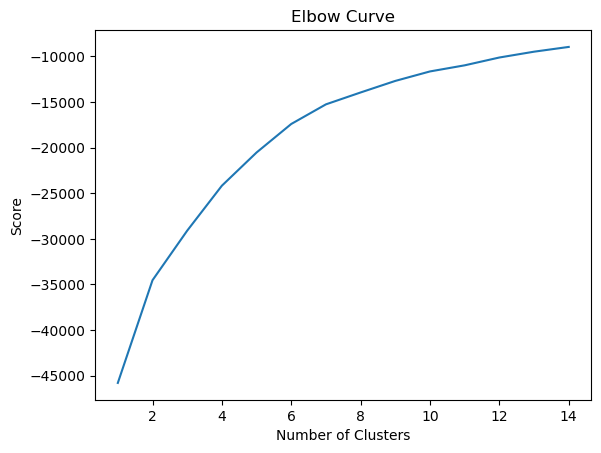

In [25]:
# Plot the elbow curve using PyLab.

elbow= pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
#### Explain why you chose that number in a markdown cell.
#### If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. As above, you can see, that the curve is more or less stable after 7.
#### What does this mean? 
It means that the optimal count for our clusters is just that—Seven.

##### What if we have no elbow at all? For instance, if we run the elbow technique on our data but are presented with a straight line? There are a number of things that could cause a result like this:
1. Either there aren’t any clusters in our data, or the data is grouped into one large cluster.In this situation, our data isn’t suitable for the k-means clustering algorithm. 2. We do have clusters, but the type of clusters can’t be detected . In this case, the algorithm will fail to recognize them.

### **3. Run the k-means algorithm.**

In [28]:
# Create the k-means object. 

kmeans = KMeans(n_clusters = 7) 

# The code,  kmeans = KMeans(n_clusters=7) , assigns the algorithm (with the 7 clusters) to a new object, kmeans

##### Once our kmeans object has been created, we fit it to our dataframe like so:

##### kmeans.fit(X)

In [29]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

KMeans(n_clusters=7)

**This code is what actually applies our algorithm to our dataframe. Though we can’t see the results visually right away, our clusters have already been created! To view them, we need to create a column in the dataframe with values corresponding to which cluster every observation belongs.**

### **Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.**

In [30]:
df['clusters'] = kmeans.fit_predict(df2)

C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\karya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

**This will add a new column within our dataframe. Within that cluster, we should see a combination of 0s, 1s, 2s, 3s, 4s, 5s, and 6s, each one representing one of the three clusters we created and assigning each data point to one of the clusters.**

 **Let us take a look inside the dataframe to see our new column:**

In [31]:
df.head()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro,clusters
0,2017,4.00,1.90,226,94800.0,0
1,2020,4.00,1.50,75,94800.0,0
2,2020,3.00,1.00,64,94800.0,0
3,2019,3.55,1.46,58,94800.0,0
4,1999,6.20,2.38,474,94800.0,5


**On the far right, we can see our new “clusters” column. Each row visible in the head belongs to cluster coded as 0 or 5.
We can check how many observations fall into each cluster via the value_counts() function:**

In [32]:
df['clusters'].value_counts()

clusters
0    3388
6    3043
3    1415
2     824
5     299
4     156
1      33
Name: count, dtype: int64

In [26]:
df.to_csv(os.path.join(path, '02. Data','Prepared Data', 'Clustering_Task5.csv'))

### Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

**Now to visualize our clusters! The best way to do this is by creating a plot and assigning each cluster a different color. Remember that we applied the clustering algorithm to our entire set of data. To create our plots, however, we’ll need to select only certain variables. For instance, we can start by looking at the “ Number of views last 7 days ” and “ price_in_Euro ” variables:**

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


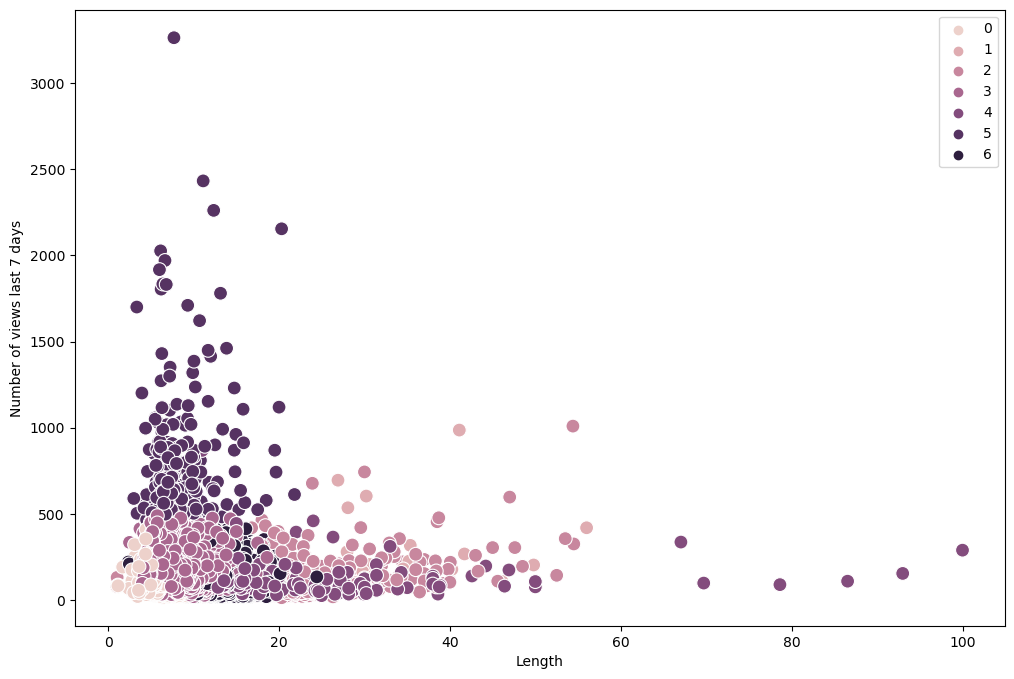

In [34]:
# Plot the clusters for the "Number of views last 7 days" and " Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

In [35]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster1.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


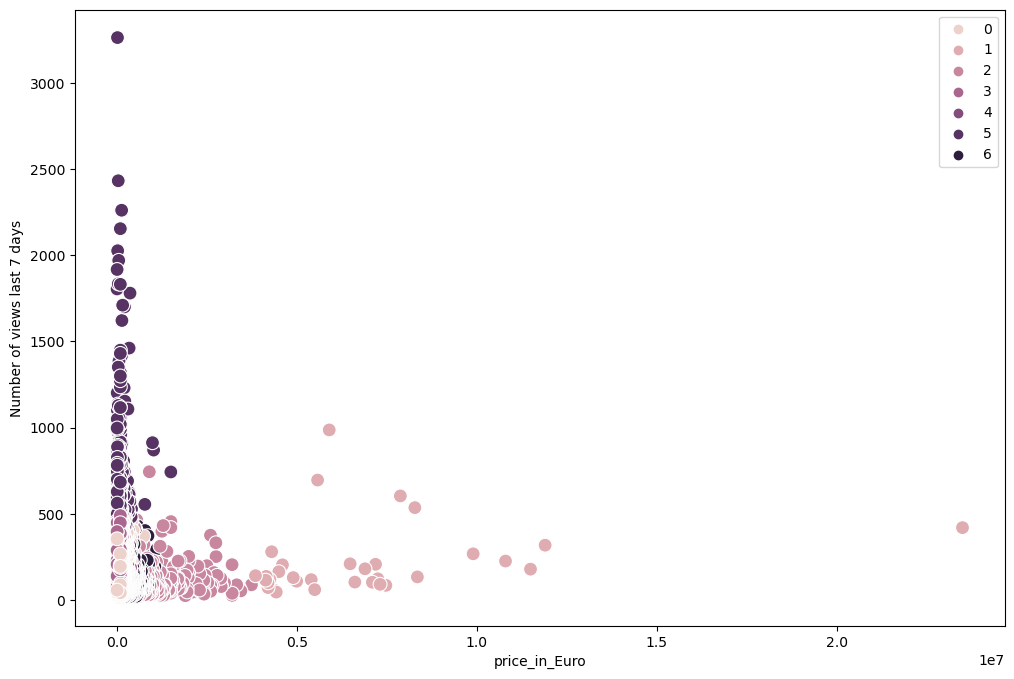

In [36]:
# Plot the clusters for the "Number of views last 7 days" and " price_in_Euro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price_in_Euro'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price_in_Euro') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

In [37]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster2.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


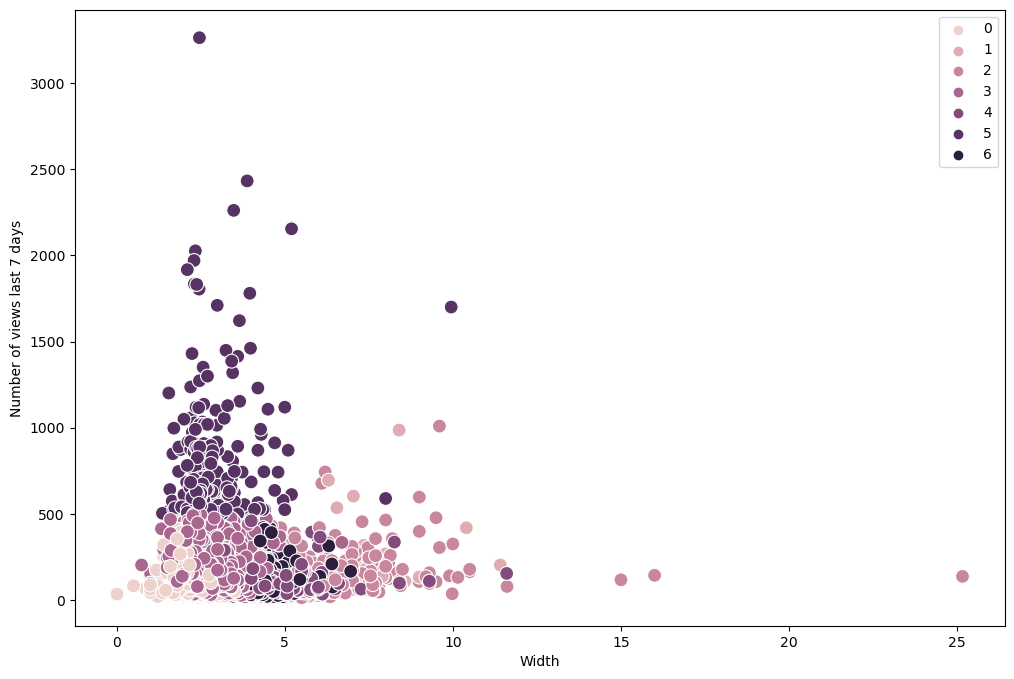

In [38]:
# Plot the clusters for the "Number of views last 7 days" and " Width"  variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Width'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Width') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

In [39]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster3.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


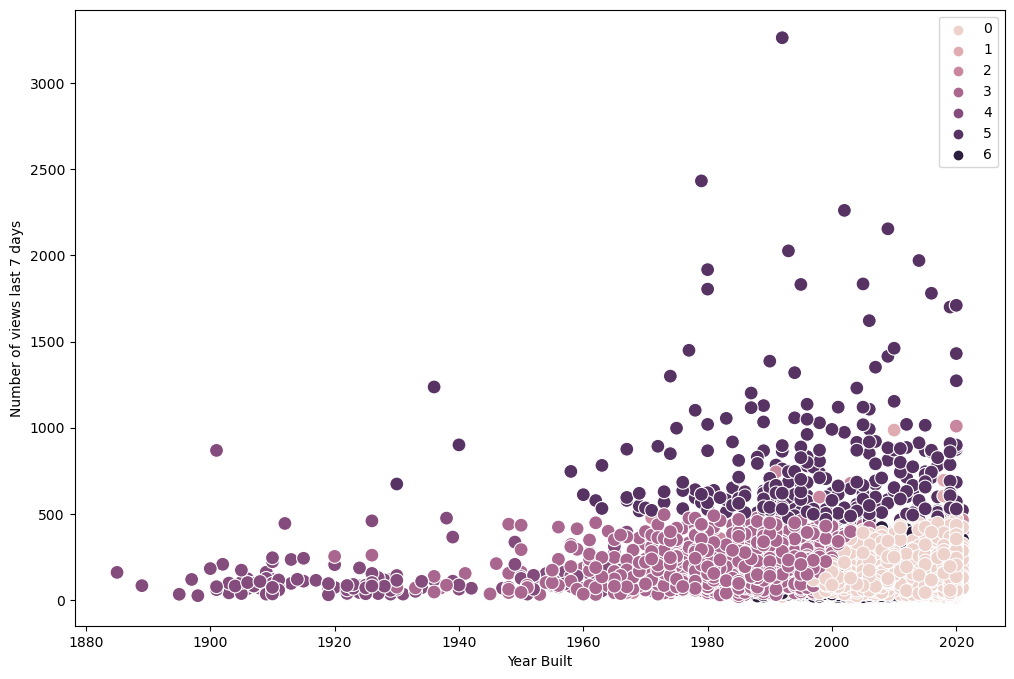

In [40]:
# Plot the clusters for the "Number of views last 7 days" and" Year Built"  variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

In [41]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster4.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


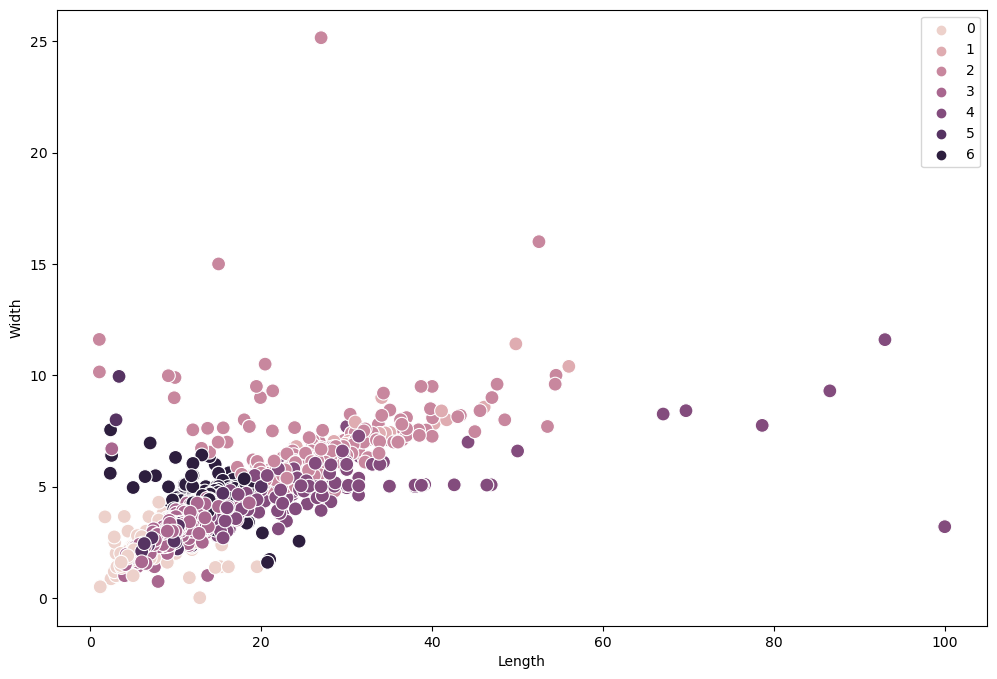

In [42]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['Width'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Width') # Label y-axis.
plt.show()

In [43]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster5.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


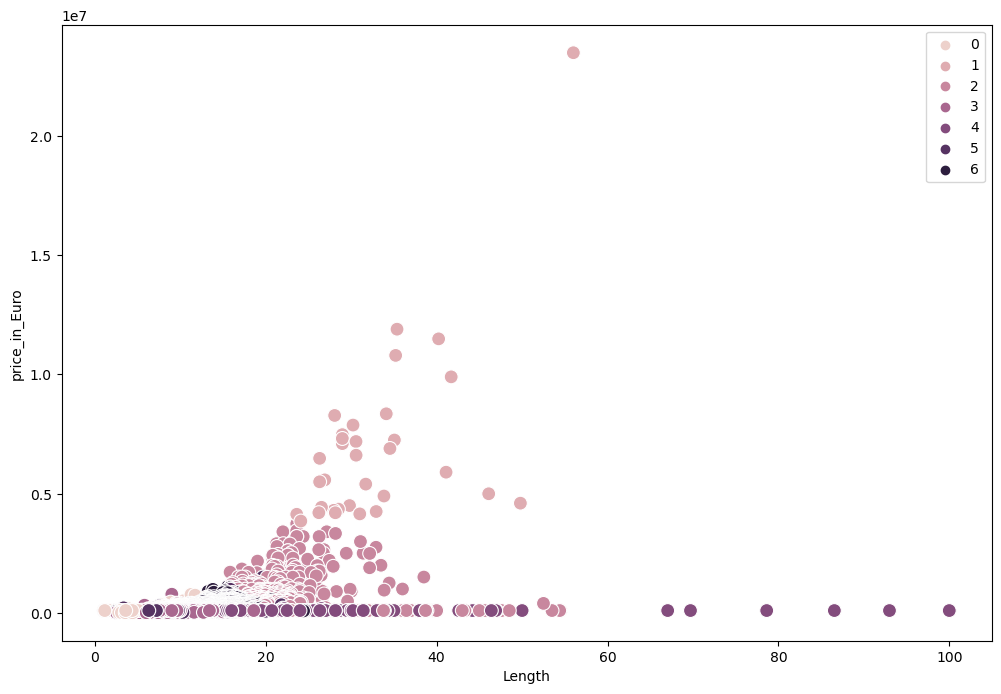

In [44]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['price_in_Euro'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('price_in_Euro') # Label y-axis.
plt.show()

In [45]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster6.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


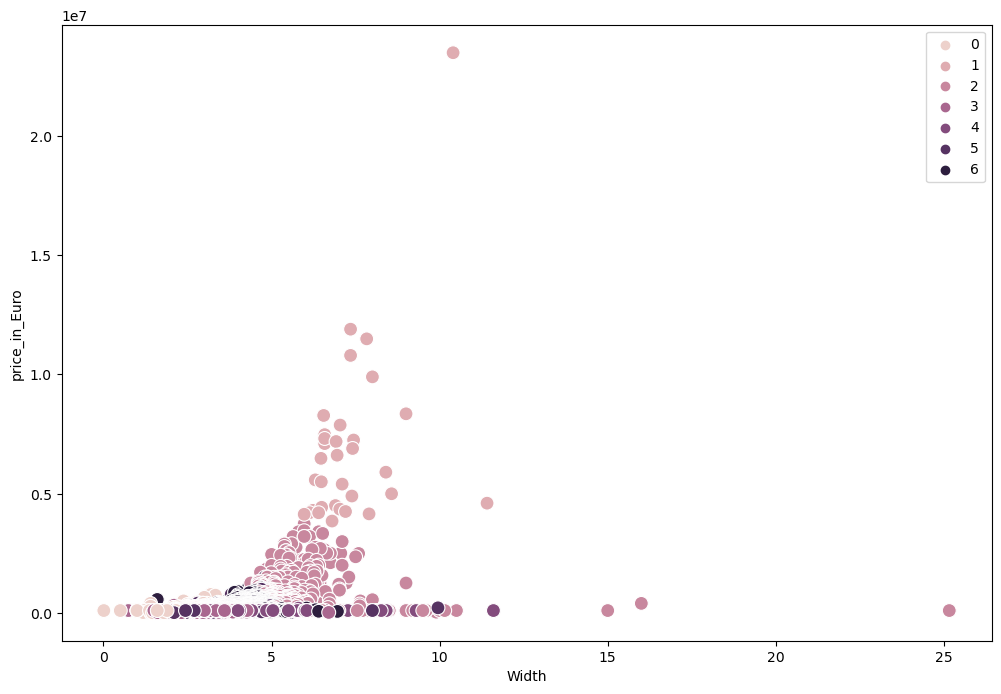

In [46]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Width'], y=df['price_in_Euro'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Width') # Label x-axis.
plt.ylabel('price_in_Euro') # Label y-axis.
plt.show()

In [47]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster7.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


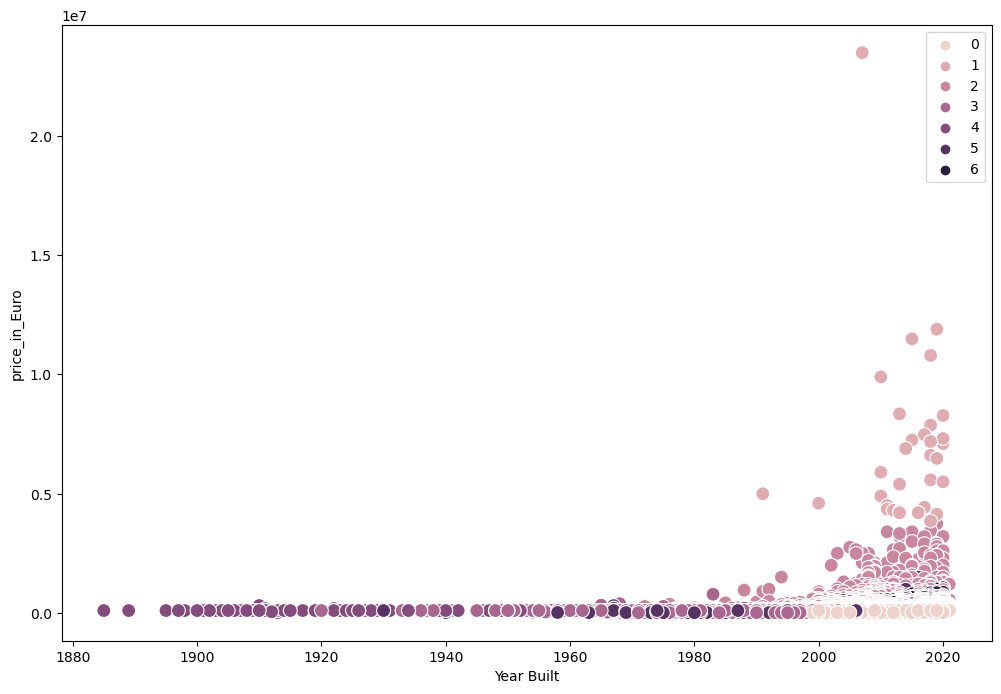

In [48]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['price_in_Euro'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('price_in_Euro') # Label y-axis.
plt.show()

In [49]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster8.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


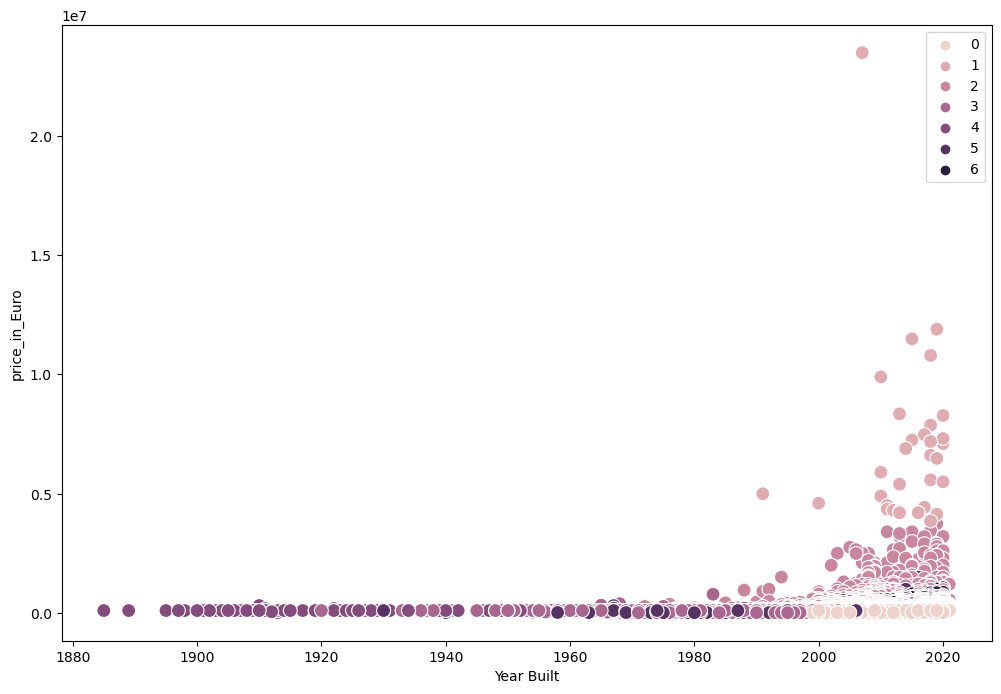

In [50]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['price_in_Euro'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('price_in_Euro') # Label y-axis.
plt.show()

In [51]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster9.png'))

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


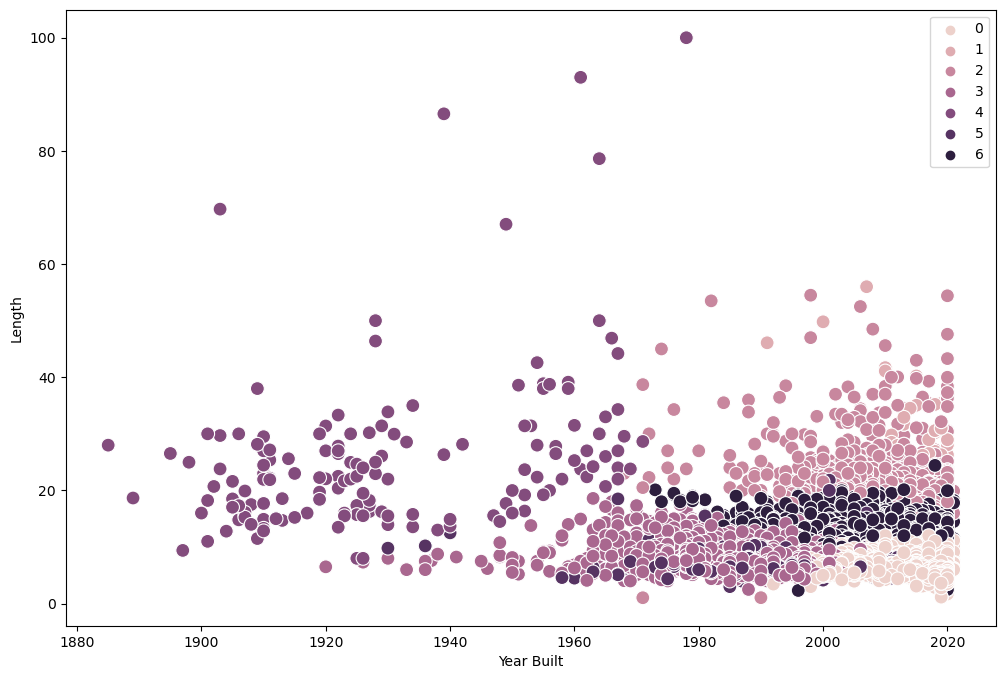

In [52]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['Length'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Length') # Label y-axis.
plt.show()

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


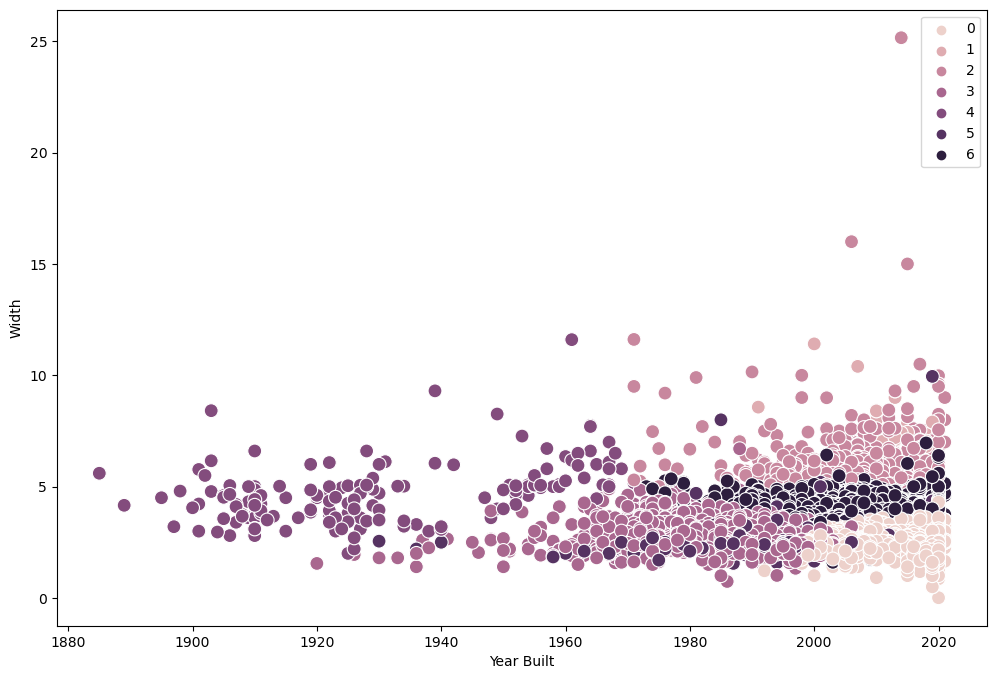

In [53]:
# Plot the clusters for the " Length" and " Width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['Width'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Width') # Label y-axis.
plt.show()

In [54]:
# Exporting the visualization
ax.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'cluster10.png'))

### **8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.**
##### **Note down your thoughts in a markdown cell.**


## The clusters make no sense while there is no clear seperation between the clusters.

### **9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.**

##### Beyond these initial observations, the best descriptive analysis we can conduct with our clusters is to check each of their individual statistics.Using the groupby() function.

In [33]:
df.groupby('clusters').agg({'Year Built':['mean','median'],'Length':['mean','median'], 'Width':['mean','median'],'Number of views last 7 days':['mean','median'],'price_in_Euro':['mean','median']})

Year Built             Length            Width         \
                 mean  median       mean median      mean median   
clusters                                                           
0         2015.054460  2018.0   7.619255   7.48  2.628840   2.55   
1         1986.313245  1989.0   9.260042   9.30  3.016454   3.02   
2         2006.359658  2007.0  13.781764  13.55  4.191112   4.20   
3         2014.303030  2016.0  32.704242  30.56  7.307576   7.03   
4         1998.292359  2000.0   8.381462   7.50  2.821229   2.56   
5         2007.509317  2008.0  23.144584  22.00  5.870894   5.60   
6         1930.602564  1926.0  25.605641  22.50  4.710000   4.65   

         Number of views last 7 days        price_in_Euro             
                                mean median          mean     median  
clusters                                                              
0                         132.962320  111.0  9.129608e+04    94800.0  
1                         196.114226  168.0  6.996914e+04    92560.0  
2                         100.997038   87.0  1.772713e+05    94800.0  
3                         221.030303  136.0  6.898311e+06  5900000.0  
4                         755.697674  630.0  9.053304e+04    61360.0  
5                         106.129193   85.0  5.821900e+05    94800.0  
6                         120.500000   93.0  9.773654e+04    94800.0

**The cluster coded as (0) consists of modern (built after 2017),small, middle price(94800-108000 Euro) ships which got  an average number of views last 7 days-(70-170 views).**

**The cluster coded as (1) consists of very old (bulit before 2000), small, middle price(94800-108000 Euro) ships, which got a good number of views last 7 days-( More than 170 views).**

**The cluster coded as (2) consists of old (built between 2000-2017), big,  high price(108000 Euro Or More) ships, who got an average number of views in last 7 days- (70-170 views).**

**The cluster coded as (3) consists of old (built between 2000-2017), very big,  high price(108000 Euro Or More) ships, who got a good number of views in last 7 days- ( More than 170 views).**

**The cluster coded as (4) consists of old (built between 2000-2017), small, middle price(94800-108000 Euro) ships, who got agood number of views in last 7 days- ( More than 170 views).**

**The cluster coded as (5) consists of old (built between 2000-2017), big, high price(108000 Euro Or More) ships, who got an average number of views in last 7 days- (70-170 views).**

**The cluster coded as (6) consists of very old(bulit before 2000), big, middle price(94800-108000 Euro) ships, who got an average number of views in last 7 days- (70-170).**

### **Propose what these results could be useful for in future steps of an analytics pipeline.**

#### These results could not be useful for future steps of an analytics pipeline.Because the clusters make no sense.

In [12]:
df.to_csv(os.path.join(path, '02. Data','Prepared Data', 'Clustering_Data_Task5.csv'))